# Computer Vision - Face Recognition

### George Mathew

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [ ]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder

In [ ]:
#### Add your code here ####
import os
os.chdir(r"/content/drive/My Drive/AIML/Module 9/Project 9/")
print("Current directory:", os.getcwd()) 

Current directory: /content/drive/My Drive/AIML/Module 9/Project 9


### Extract the zip file
- Extract Aligned Face Dataset from Pinterest.zip

In [ ]:
#### Add your code here ####
from zipfile import ZipFile
zf = ZipFile('/content/drive/My Drive/AIML/Module 9/Project 9/Aligned Face Dataset.zip', 'r')
zf.extractall('extract_folder/')
zf.close()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [ ]:
import numpy as np

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('extract_folder/PINS')

### Define function to load image
- Define a function to load image from the metadata

In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image
- Load one image using the function "load_image"

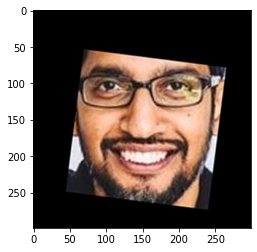

In [ ]:
#### Add your code here ####
filePath = 'extract_folder/PINS/pins_Sundar Pichai/Sundar Pichai2_740.jpg'
load_image(filePath)
import matplotlib.pyplot as plt
plt.imshow(load_image(filePath))
plt.show()

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [ ]:
model = vgg_face()
model.load_weights('/content/drive/My Drive/AIML/Module 9/Project 9/vgg_face_weights.h5')

### Get vgg_face_descriptor

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
  #### Add your code here ####
  print(i)
  image_path = m.image_path()
  try:
    image = load_image(image_path)
    image = (image / 255).astype(np.float32)
    image = cv2.resize(image, dsize=(224,224))
    embedding_vec = vgg_face_descriptor.predict(np.expand_dims(image, axis=0))[0]
    embeddings[i] = embedding_vec
  except Exception as e:
    embeddings[i] = np.zeros(2622)

Streaming output truncated to the last 5000 lines.
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960

In [ ]:
import pickle

embeddings_pickle = open("/content/drive/My Drive/AIML/Module 9/Project 9/embeddings_pickle.pickle","wb")
pickle.dump(embeddings, embeddings_pickle)
embeddings_pickle.close()

In [ ]:
pickle_in = open("/content/drive/My Drive/AIML/Module 9/Project 9/embeddings_pickle.pickle","rb")
embeddings = embeddings_pickle_loaded = pickle.load(pickle_in)
print(embeddings_pickle_loaded)

[[ 0.03170307 -0.0150513  -0.01243402 ...  0.00043141  0.00219081
  -0.00908097]
 [ 0.03497704 -0.00105059 -0.01248933 ... -0.01053091  0.0017932
   0.02439154]
 [ 0.02801892 -0.00112629 -0.01265749 ... -0.00904748 -0.00578399
   0.02125829]
 ...
 [ 0.00965871  0.00372159 -0.01345864 ... -0.01433404  0.01899943
   0.03899154]
 [ 0.00230931  0.00094764 -0.00544815 ... -0.01600495  0.01053974
   0.03683253]
 [ 0.01772299  0.01064049  0.01995195 ... -0.02618429  0.03288926
   0.04882648]]


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

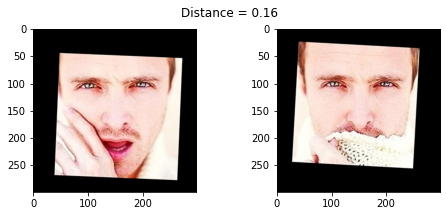

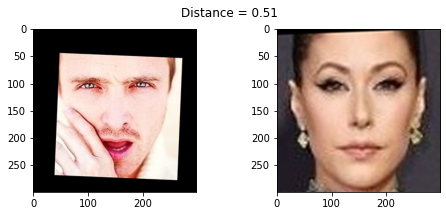

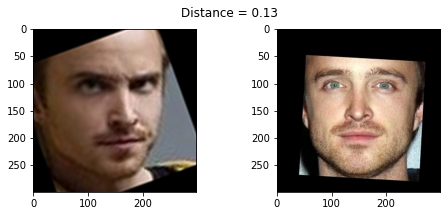

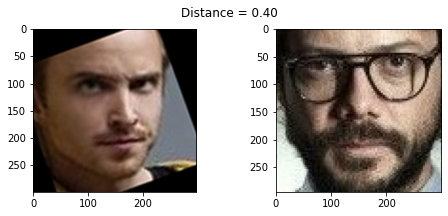

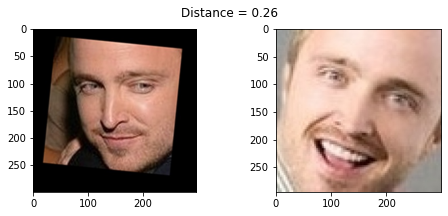

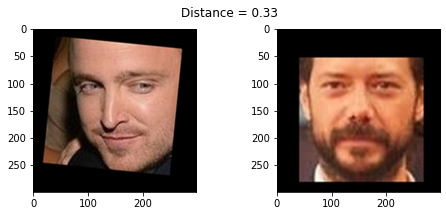

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [ ]:
#import random
#random.shuffle(metadata)

train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]/255
# another half as test examples of 10 identities
X_test = embeddings[test_idx]/255

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

### Encode the Labels
- Encode the targets
- Use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(targets)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

### Standardize the feature values 
- Scale the features using StandardScaler

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(9573, 2622)
(1197, 2622)


### Reduce dimensions using PCA
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

#### Add your code here ####
pca = PCA(n_components=128)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

### Build a Classifier
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [ ]:
# With Cross-Validation of 5
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import svm, metrics

clf_cv = svm.SVC(kernel='rbf', C=1.0)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
clf_cv.fit(X_train_PCA, y_train_le)
scores = cross_val_score(clf_cv, X_train_PCA, y_train_le, cv=cv)
print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

y_pred = clf_cv.predict(X_test_PCA)
print("Test Accuracy: ", metrics.accuracy_score(y_test_le, y_pred))

Training Accuracy: 0.96 (+/- 0.00)
Test Accuracy:  0.9590643274853801


### Test results
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

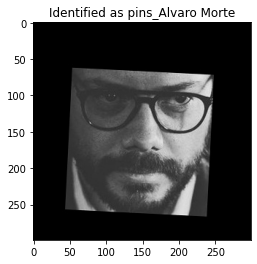

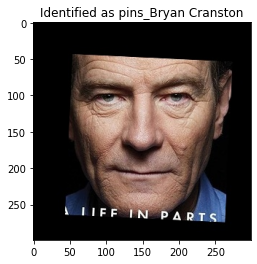

In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = clf_cv.predict(X_test_PCA[example_idx].reshape(-1, 128))
example_identity = le.inverse_transform(example_prediction)[0]

plt.title(f'Identified as {example_identity}');
plt.imshow(example_image)
plt.show()


#Try one more

example_idx = 100

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = clf_cv.predict(X_test_PCA[example_idx].reshape(-1, 128))
example_identity = le.inverse_transform(example_prediction)[0]

plt.title(f'Identified as {example_identity}');
plt.imshow(example_image)
plt.show()


-> With Cross-Validation:
* Training Accuracy:   96%
* Test Accuracy:       95.9%
<br> The Training and Test Accuracy have improved and Test Accuracy is comparative to the Training. And Since Cross-Validation generlizes better, I'll be retaining this and dumping the "Without Cross-Validation" version.